<center>
<h1> Zinda Hospital - Prediction using Logistic Regression
</center>

###### One of the leading hospitals would like to improve customer experience at Zinda Hospital and predict Positive, Negative or Passive score from customer surveys conducted by the hospital.

###### 1. Perform Binary Classification and display the results
###### 2. Perform Multinomial Classification and display the results

###### Author -  Anuj Chauhan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

mhexcel = pd.ExcelFile('Zinda Hospital.xlsx')

mhtraindf = mhexcel.parse(sheet_name='Training Data')
mhtestdf = mhexcel.parse(sheet_name='Test Data')
mhmergeddf = pd.concat([mhtraindf,mhtestdf])

print(mhmergeddf.shape)


(5353, 52)


## Converting this problem into a binary classification problem

In [51]:
mhmergeddf['NPS_Status_Combined'] = np.where((mhmergeddf['NPS_Status']=='Passive') | (mhmergeddf['NPS_Status']=='Detractor'),1,0)

mhmergeddf.NPS_Status_Combined.value_counts()

0    3343
1    2010
Name: NPS_Status_Combined, dtype: int64

## One Hot Encoding of dependent variables and Train-Test split

In [52]:
X_features = mhmergeddf[mhmergeddf.columns.difference(['SN','NPS_Status','NPS_Status_Combined','AdmissionDate','DischargeDate','CE_NPS'])]

encoded_X_features = pd.get_dummies(mhmergeddf[X_features.columns],drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X_features,mhmergeddf.NPS_Status_Combined,test_size=0.3,random_state=42)

## Random Forest Feature Selection

In [54]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

forest = RandomForestClassifier(n_estimators=250,random_state=1)

feat_labels = X_train.columns

forest.fit(X_train,y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(encoded_X_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1) HospitalNo2                    0.072347
 2) AgeYrs                         0.061961
 3) CE_CSAT                        0.051667
 4) Estimatedcost                  0.051126
 5) CE_VALUEFORMONEY               0.049178
 6) LengthofStay                   0.043586
 7) AE_ATTENDEEFOOD                0.028219
 8) CE_ACCESSIBILITY               0.027221
 9) DP_DISCHARGEPROCESS            0.023756
10) DP_DISCHARGETIME               0.022733
11) AD_TARRIFFPACKAGESEXPLAINATION 0.022555
12) FNB_FOODQUALITY                0.020205
13) FNB_FOODDELIVERYTIME           0.019451
14) FNB_DIETICIAN                  0.017923
15) AD_TIME                        0.017724
16) DP_DISCHARGEQUERIES            0.017156
17) INR_ROOMPEACE                  0.017116
18) INR_ROOMAMBIENCE               0.016516
19) BedCategory_GENERAL            0.015913
20) Sex_M                          0.015148
21) AE_PATIENTSTATUSINFO           0.014954
22) DOC_VISITS                     0.014304
23) INR_ROOMCLEANLINESS         

# Selecting features based on user specified threshold

In [55]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,threshold=0.011991, prefit=True)

X_selected_features = sfm.transform(X_train)

print('Number of features that meet this threshold criterion: ',X_selected_features.shape[1])
X_selected_feature_columns = []
for f in range(X_selected_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
    X_selected_feature_columns.append(feat_labels[indices[f]])

X_selected_feature_columns  

Number of features that meet this threshold criterion:  30
 1) HospitalNo2                    0.072347
 2) AgeYrs                         0.061961
 3) CE_CSAT                        0.051667
 4) Estimatedcost                  0.051126
 5) CE_VALUEFORMONEY               0.049178
 6) LengthofStay                   0.043586
 7) AE_ATTENDEEFOOD                0.028219
 8) CE_ACCESSIBILITY               0.027221
 9) DP_DISCHARGEPROCESS            0.023756
10) DP_DISCHARGETIME               0.022733
11) AD_TARRIFFPACKAGESEXPLAINATION 0.022555
12) FNB_FOODQUALITY                0.020205
13) FNB_FOODDELIVERYTIME           0.019451
14) FNB_DIETICIAN                  0.017923
15) AD_TIME                        0.017724
16) DP_DISCHARGEQUERIES            0.017156
17) INR_ROOMPEACE                  0.017116
18) INR_ROOMAMBIENCE               0.016516
19) BedCategory_GENERAL            0.015913
20) Sex_M                          0.015148
21) AE_PATIENTSTATUSINFO           0.014954
22) DOC_VISITS   

['HospitalNo2',
 'AgeYrs',
 'CE_CSAT',
 'Estimatedcost',
 'CE_VALUEFORMONEY',
 'LengthofStay',
 'AE_ATTENDEEFOOD',
 'CE_ACCESSIBILITY',
 'DP_DISCHARGEPROCESS',
 'DP_DISCHARGETIME',
 'AD_TARRIFFPACKAGESEXPLAINATION',
 'FNB_FOODQUALITY',
 'FNB_FOODDELIVERYTIME',
 'FNB_DIETICIAN',
 'AD_TIME',
 'DP_DISCHARGEQUERIES',
 'INR_ROOMPEACE',
 'INR_ROOMAMBIENCE',
 'BedCategory_GENERAL',
 'Sex_M',
 'AE_PATIENTSTATUSINFO',
 'DOC_VISITS',
 'INR_ROOMCLEANLINESS',
 'INR_ROOMEQUIPMENT',
 'AD_STAFFATTITUDE',
 'BedCategory_SEMISPECIAL',
 'AE_ATTENDEECARE',
 'InsPayorcategory_PATIENT',
 'InsPayorcategory_INSURANCE',
 'Department_GEN']

selected_encoded_features = X_train[X_selected_feature_columns]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(selected_encoded_features)
#sc1 = StandardScaler()
#sc1.fit(encoded_mhtestdf)
X_selected_features_train_std = sc.transform(selected_encoded_features)
#X_features_test_std = sc1.transform(encoded_mhtestdf)

#from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression(C=100.0,random_state=1)
#lr_model = lr.fit(X_features_train_std,y_train)
#print(lr_model.summary2())
#print(lr_model.scor)

## Binary Logistic Regression 

In [56]:
import statsmodels.api as sm

X = X_train[X_selected_feature_columns]

#X_test = X_test[X_selected_feature_columns]

logit = sm.Logit(y_train,sm.add_constant(X))
logit_model = logit.fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.529087
         Iterations 6


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     NPS_Status_Combined   No. Observations:                 3747
Model:                           Logit   Df Residuals:                     3716
Method:                            MLE   Df Model:                           30
Date:                 Mon, 07 Oct 2019   Pseudo R-squ.:                  0.2051
Time:                         18:28:11   Log-Likelihood:                -1982.5
converged:                        True   LL-Null:                       -2494.1
Covariance Type:             nonrobust   LLR p-value:                6.368e-196
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.3609      0.426     19.638      0.000       7.526       9.195
HospitalNo2                    -1.662e-06   1.36e-06     -1.223      0.221   -4.32e-06       1e-06
AgeYrs                            -0.0041      0.002     -2.271      0.023      -0.008      -0.001
CE_CSAT                           -0.7221      0.096     -7.523      0.000      -0.910      -0.534
Estimatedcost                   3.496e-07    4.2e-07      0.833      0.405   -4.73e-07    1.17e-06
CE_VALUEFORMONEY                  -0.5662      0.083     -6.816      0.000      -0.729      -0.403
LengthofStay                      -0.0059      0.008     -0.770      0.441      -0.021       0.009
AE_ATTENDEEFOOD                   -0.1122      0.079     -1.425      0.154      -0.267       0.042
CE_ACCESSIBILITY                  -0.1943      0.085     -2.274      0.023      -0.362      -0.027
DP_DISCHARGEPROCESS                0.0954      0.127      0.749      0.454      -0.154       0.345
DP_DISCHARGETIME                  -0.1687      0.104     -1.629      0.103      -0.372       0.034
AD_TARRIFFPACKAGESEXPLAINATION    -0.3770      0.092     -4.098      0.000      -0.557      -0.197
FNB_FOODQUALITY                   -0.0953      0.075     -1.266      0.206      -0.243       0.052
FNB_FOODDELIVERYTIME              -0.1165      0.086     -1.359      0.174      -0.284       0.051
FNB_DIETICIAN                     -0.0214      0.092     -0.233      0.816      -0.202       0.159
AD_TIME                            0.0019      0.082      0.023      0.982      -0.158       0.162
DP_DISCHARGEQUERIES               -0.2048      0.108     -1.903      0.057      -0.416       0.006
INR_ROOMPEACE                     -0.1020      0.084     -1.209      0.227      -0.268       0.063
INR_ROOMAMBIENCE                  -0.1836      0.111     -1.652      0.099      -0.401       0.034
BedCategory_GENERAL               -0.4401      0.110     -4.000      0.000      -0.656      -0.224
Sex_M                             -0.0608      0.079     -0.766      0.443      -0.216       0.095
AE_PATIENTSTATUSINFO              -0.2604      0.112     -2.320      0.020      -0.480      -0.040
DOC_VISITS                        -0.1930      0.086     -2.235      0.025      -0.362      -0.024
INR_ROOMCLEANLINESS                0.1581      0.093      1.703      0.089      -0.024       0.340
INR_ROOMEQUIPMENT                  0.1667      0.100      1.671      0.095      -0.029       0.362
AD_STAFFATTITUDE                   0.2875      0.098      2.938      0.003       0.096       0.479
BedCategory_SEMISPECIAL            0.0798      0.092      0.864      0.387      -0.101       0.261
AE_ATTENDEECARE                    0.0236      0.106      0.224      0.823      -0.183       0.231
InsPayorcategory_PATIENT           0.1349      0.112      1.203      0.229      -0.085       0.355
InsPayorcategory_INSURANCE         0.1268      0.116      1.091 

In [57]:
def get_significant_vars(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])


In [58]:
significant_vars = get_significant_vars(logit_model)
#print(significant_vars)
significant_vars.remove('const')
final_logit = sm.Logit(y_train,sm.add_constant(X[significant_vars]))
final_logit_model = final_logit.fit()
final_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.536109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     NPS_Status_Combined   No. Observations:                 3747
Model:                           Logit   Df Residuals:                     3737
Method:                            MLE   Df Model:                            9
Date:                 Mon, 07 Oct 2019   Pseudo R-squ.:                  0.1946
Time:                         18:29:27   Log-Likelihood:                -2008.8
converged:                        True   LL-Null:                       -2494.1
Covariance Type:             nonrobust   LLR p-value:                3.728e-203
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.4355      0.386     21.877      0.000       7.680       9.191
AgeYrs                            -0.0043      0.002     -2.529      0.011      -0.008      -0.001
CE_CSAT                           -0.7858      0.094     -8.342      0.000      -0.970      -0.601
CE_VALUEFORMONEY                  -0.6530      0.081     -8.101      0.000      -0.811      -0.495
CE_ACCESSIBILITY                  -0.1775      0.084     -2.123      0.034      -0.341      -0.014
AD_TARRIFFPACKAGESEXPLAINATION    -0.4867      0.083     -5.836      0.000      -0.650      -0.323
BedCategory_GENERAL               -0.5790      0.090     -6.409      0.000      -0.756      -0.402
AE_PATIENTSTATUSINFO              -0.4143      0.087     -4.785      0.000      -0.584      -0.245
DOC_VISITS                        -0.2429      0.084     -2.887      0.004      -0.408      -0.078
AD_STAFFATTITUDE                   0.2369      0.090      2.640      0.008       0.061       0.413
==================================================================================================
"""

In [59]:
auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))
#auc_score

AUC score :  0.78


## Creating Confusion Matrix

In [60]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm,annot = True, fmt='.2f',xticklabels=['Detractors','Promoters'],yticklabels= ['Detractors','Promoters'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

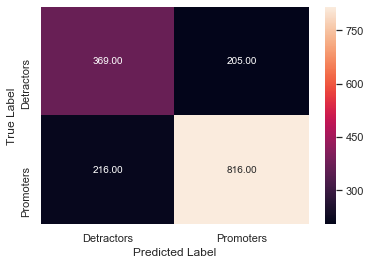

In [61]:
draw_cm(Y_pred_test_df.actual,Y_pred_test_df.predicted)

## Creating ROC Curve

In [62]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize = (8,6))
    plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.xlim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.show()
    return fpr, tpr, thresholds

    

In [63]:
significant_vars = get_significant_vars(final_logit_model)
significant_vars.remove('const')
Y_pred_test_df = pd.DataFrame({"actual": y_test,"predicted_prob": final_logit_model.predict(sm.add_constant(X_test[significant_vars]))})

Y_pred_test_df['predicted'] = Y_pred_test_df.predicted_prob.map(lambda x:1 if x>0.5 else 0)

from sklearn import metrics

print(metrics.classification_report(Y_pred_test_df.actual,Y_pred_test_df.predicted))

auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))

sorted_Y_pred_test_df = Y_pred_test_df[['predicted_prob','actual']].sort_values('predicted_prob',ascending=False)

num_per_decile = int(len(sorted_Y_pred_test_df)/10)
print("obs per decile ",num_per_decile)

def get_deciles(df):
    df['decile'] = 1
    
    idx = 0
    
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    
    df['decile'] = df['decile'] + 1
    return df

deciles_predict_df = get_deciles(sorted_Y_pred_test_df)

#deciles_predict_df[0:60]

#Y_pred_test_df.sample(10,random_state=42)


gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']

gain_lift_df['gain_percentage'] = (100*gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

gain_lift_df['lift'] = (gain_lift_df.gain_percentage/(gain_lift_df.decile*10))

gain_lift_df

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1032
           1       0.66      0.57      0.61       574

    accuracy                           0.74      1606
   macro avg       0.72      0.70      0.71      1606
weighted avg       0.74      0.74      0.74      1606

AUC score :  0.78
obs per decile  160


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,decile,gain,gain_percentage,lift
0,1,149,25.958188,2.595819
1,2,92,41.986063,2.099303
2,3,77,55.400697,1.846690
3,4,67,67.073171,1.676829
4,5,42,74.390244,1.487805
5,6,42,81.707317,1.361789
6,7,38,88.327526,1.261822
7,8,25,92.682927,1.158537
8,9,21,96.341463,1.070461
9,10,21,100.000000,1.000000


          tpr       fpr  thresholds      diff
526  0.646341  0.211240    0.444644  0.435101
510  0.634146  0.199612    0.458009  0.434534
524  0.644599  0.210271    0.444964  0.434328
518  0.639373  0.205426    0.448457  0.433946
511  0.634146  0.200581    0.457079  0.433565


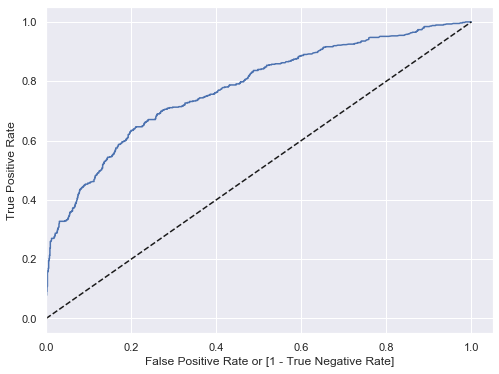

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1032
           1       0.63      0.64      0.64       574

    accuracy                           0.74      1606
   macro avg       0.71      0.72      0.72      1606
weighted avg       0.74      0.74      0.74      1606

AUC score :  0.78


In [64]:
fpr,tpr,thresholds = metrics.roc_curve(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob,drop_intermediate = False)

tpr_fpr = pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds})
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

print(tpr_fpr.sort_values('diff',ascending=False)[0:5])

draw_roc(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)

prob_cutoff = 0.445

Y_pred_test_df['predicted'] = Y_pred_test_df.predicted_prob.map(lambda x:1 if x> prob_cutoff else 0)

from sklearn import metrics

print(metrics.classification_report(Y_pred_test_df.actual,Y_pred_test_df.predicted))

auc_score = metrics.roc_auc_score(Y_pred_test_df.actual,Y_pred_test_df.predicted_prob)
print('AUC score : ', round(float(auc_score),2))



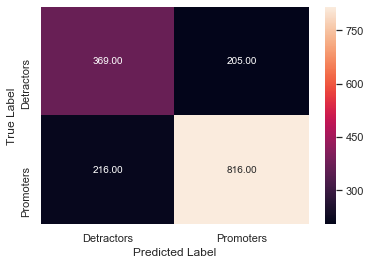

In [65]:
draw_cm(Y_pred_test_df.actual,Y_pred_test_df.predicted)

## Multinomial Classification

In [66]:
mhmergeddf['NPS_Status'] = mhmergeddf['NPS_Status'].map({'Promotor':0,'Passive':1,'Detractor':2})

In [67]:
mhmergeddf['NPS_Status'].value_counts()

0    3343
1    1464
2     546
Name: NPS_Status, dtype: int64

In [68]:
X_features = mhmergeddf[mhmergeddf.columns.difference(['SN','NPS_Status','NPS_Status_Combined','AdmissionDate','DischargeDate','CE_NPS'])]

encoded_X_features = pd.get_dummies(mhmergeddf[X_features.columns],drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X_features,mhmergeddf['NPS_Status'],test_size=0.3,random_state=42)


## Feature selection

In [69]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

forest = RandomForestClassifier(n_estimators=250,random_state=1)

feat_labels = X_train.columns

forest.fit(X_train,y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(encoded_X_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1) HospitalNo2                    0.070510
 2) AgeYrs                         0.061932
 3) Estimatedcost                  0.052710
 4) CE_VALUEFORMONEY               0.050036
 5) CE_CSAT                        0.047106
 6) LengthofStay                   0.043747
 7) CE_ACCESSIBILITY               0.029103
 8) AE_ATTENDEEFOOD                0.024194
 9) DP_DISCHARGETIME               0.020493
10) AD_TARRIFFPACKAGESEXPLAINATION 0.020460
11) DP_DISCHARGEPROCESS            0.020150
12) FNB_FOODQUALITY                0.019497
13) AD_TIME                        0.018733
14) FNB_FOODDELIVERYTIME           0.017545
15) DP_DISCHARGEQUERIES            0.017298
16) INR_ROOMPEACE                  0.016621
17) FNB_DIETICIAN                  0.016379
18) INR_ROOMCLEANLINESS            0.016163
19) INR_ROOMAMBIENCE               0.015813
20) Sex_M                          0.015635
21) AE_PATIENTSTATUSINFO           0.014979
22) DOC_VISITS                     0.014517
23) BedCategory_GENERAL         

## Selecting users based on user specified threshold

In [70]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest,threshold=0.012638, prefit=True)

X_selected_features = sfm.transform(X_train)

print('Number of features that meet this threshold criterion: ',X_selected_features.shape[1])
X_selected_feature_columns = []
for f in range(X_selected_features.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
    X_selected_feature_columns.append(feat_labels[indices[f]])

X_selected_feature_columns 

Number of features that meet this threshold criterion:  30
 1) HospitalNo2                    0.070510
 2) AgeYrs                         0.061932
 3) Estimatedcost                  0.052710
 4) CE_VALUEFORMONEY               0.050036
 5) CE_CSAT                        0.047106
 6) LengthofStay                   0.043747
 7) CE_ACCESSIBILITY               0.029103
 8) AE_ATTENDEEFOOD                0.024194
 9) DP_DISCHARGETIME               0.020493
10) AD_TARRIFFPACKAGESEXPLAINATION 0.020460
11) DP_DISCHARGEPROCESS            0.020150
12) FNB_FOODQUALITY                0.019497
13) AD_TIME                        0.018733
14) FNB_FOODDELIVERYTIME           0.017545
15) DP_DISCHARGEQUERIES            0.017298
16) INR_ROOMPEACE                  0.016621
17) FNB_DIETICIAN                  0.016379
18) INR_ROOMCLEANLINESS            0.016163
19) INR_ROOMAMBIENCE               0.015813
20) Sex_M                          0.015635
21) AE_PATIENTSTATUSINFO           0.014979
22) DOC_VISITS   

['HospitalNo2',
 'AgeYrs',
 'Estimatedcost',
 'CE_VALUEFORMONEY',
 'CE_CSAT',
 'LengthofStay',
 'CE_ACCESSIBILITY',
 'AE_ATTENDEEFOOD',
 'DP_DISCHARGETIME',
 'AD_TARRIFFPACKAGESEXPLAINATION',
 'DP_DISCHARGEPROCESS',
 'FNB_FOODQUALITY',
 'AD_TIME',
 'FNB_FOODDELIVERYTIME',
 'DP_DISCHARGEQUERIES',
 'INR_ROOMPEACE',
 'FNB_DIETICIAN',
 'INR_ROOMCLEANLINESS',
 'INR_ROOMAMBIENCE',
 'Sex_M',
 'AE_PATIENTSTATUSINFO',
 'DOC_VISITS',
 'BedCategory_GENERAL',
 'INR_ROOMEQUIPMENT',
 'AD_STAFFATTITUDE',
 'Department_GEN',
 'AE_ATTENDEECARE',
 'BedCategory_SEMISPECIAL',
 'InsPayorcategory_PATIENT',
 'FNB_STAFFATTITUDE']

In [71]:
from sklearn.linear_model import LogisticRegression

lr_multinomial = LogisticRegression(multi_class='multinomial',solver='newton-cg')

lr = LogisticRegression()

lr_model = lr.fit(X_train[X_selected_feature_columns],y_train)
lr_multinomial_model = lr_multinomial.fit(X_train[X_selected_feature_columns],y_train)


print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr_model.predict(X_train[X_selected_feature_columns])))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr_model.predict(X_test[X_selected_feature_columns])))


print("Multinomial Logistic regression Train Accuracy using multinomial :: ", metrics.accuracy_score(y_train, lr_multinomial_model.predict(X_train[X_selected_feature_columns])))
print("Multinomial Logistic regression Test Accuracy multinomial :: ", metrics.accuracy_score(y_test, lr_multinomial_model.predict(X_test[X_selected_feature_columns])))
 

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Multinomial Logistic regression Train Accuracy ::  0.6167600747264478
Multinomial Logistic regression Test Accuracy ::  0.6425902864259029
Multinomial Logistic regression Train Accuracy using multinomial ::  0.6728049105951428
Multinomial Logistic regression Test Accuracy multinomial ::  0.686799501867995


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.6728049105951428


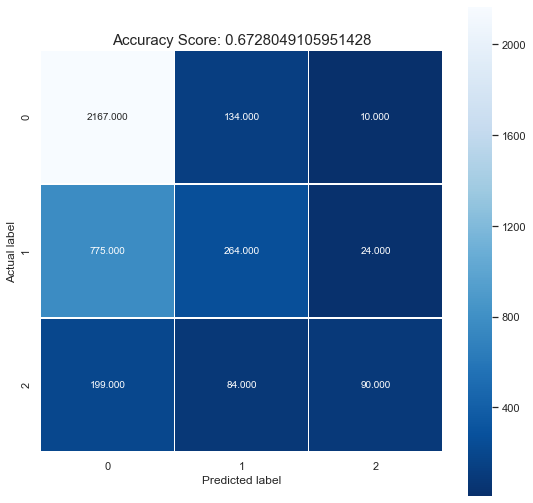

In [79]:
cm = metrics.confusion_matrix(y_train, lr_multinomial_model.predict(X_train[X_selected_feature_columns]))

score = lr_multinomial_model.score(X_train[X_selected_feature_columns], y_train)
print(score)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(score)
plt.title(plot_title, size = 15);

0.686799501867995


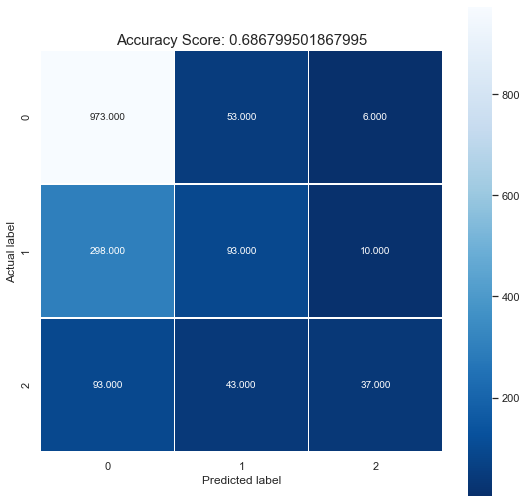

In [77]:
cm = metrics.confusion_matrix(y_test, lr_multinomial_model.predict(X_test[X_selected_feature_columns]))

score = lr_multinomial_model.score(X_test[X_selected_feature_columns], y_test)
print(score)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plot_title = 'Accuracy Score: {0}'.format(score)
plt.title(plot_title, size = 15);

In [78]:
y_test_predict_prob = lr_multinomial_model.predict(X_test[X_selected_feature_columns])
lr_multinomial_model.coef_


array([[-2.34108976e-06, -2.35540225e-03, -3.35386356e-07,
         5.08577150e-01,  3.98988990e-01, -1.38616729e-04,
        -5.45158171e-02,  8.14007470e-02,  1.26075370e-01,
         2.47771595e-01, -4.82303640e-02, -1.97216849e-02,
        -6.79065329e-02,  1.98917872e-01,  8.92635851e-02,
         1.42244263e-02,  6.41894001e-02, -1.02814996e-01,
         1.37269703e-01, -1.09998684e-01,  1.34514725e-01,
        -1.38281776e-01,  5.08438821e-02, -1.52377665e-01,
        -2.74074132e-01, -2.86556833e-01, -1.26491703e-02,
        -2.30131621e-01, -1.13767988e-01, -2.33042579e-01],
       [-6.27859711e-07, -4.59938116e-03,  2.34176287e-07,
         2.55746839e-01, -9.13080620e-02, -3.33458308e-03,
         1.54320529e-01, -1.43401490e-01, -8.96051589e-03,
        -1.58532259e-01, -3.09621787e-02, -7.82499722e-02,
        -1.43311972e-01,  2.25023500e-02,  4.24603929e-02,
        -6.46270030e-02, -9.84438792e-02,  2.22830991e-01,
        -1.52540037e-01, -1.03318766e-01, -9.43349451e-

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#from sklearn.datasets import make_classification


X, y = encoded_mhtraindf,y_train

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [9]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=bankloans_num.apply(lambda x: var_summary(x)).T

In [10]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
default,700.0,150.0,183.000000,0.261429,0.000000,0.439727,0.193360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
ed,850.0,0.0,1454.000000,1.710588,1.000000,0.927784,0.860783,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.00000
age,850.0,0.0,29775.000000,35.029412,34.000000,8.041432,64.664623,20.000000,21.000000,23.000000,25.000000,29.000000,34.000000,41.000000,47.000000,49.000000,53.000000,56.00000
address,850.0,0.0,7116.000000,8.371765,7.000000,6.895016,47.541251,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,19.000000,22.550000,26.510000,34.00000
employ,850.0,0.0,7281.000000,8.565882,7.000000,6.777884,45.939706,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,13.000000,18.000000,21.550000,29.000000,33.00000
debtinc,850.0,0.0,8645.900000,10.171647,8.700000,6.719441,45.150891,0.100000,0.900000,1.900000,2.900000,5.100000,8.700000,13.800000,19.200000,23.510000,31.565000,41.30000
income,850.0,0.0,39674.000000,46.675294,35.000000,38.543054,1485.566998,13.000000,14.490000,17.000000,19.000000,24.000000,35.000000,55.750000,84.000000,115.550000,220.510000,446.00000
othdebt,850.0,0.0,2616.970979,3.078789,2.003243,3.398803,11.551864,0.045584,0.162394,0.359900,0.552050,1.045942,2.003243,3.903001,7.111941,9.481105,16.931503,35.19750
creddebt,850.0,0.0,1340.284021,1.576805,0.885091,2.125840,4.519196,0.011696,0.030349,0.108927,0.178306,0.382176,0.885091,1.898440,3.703304,5.348674,10.285997,20.56131


In [11]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(bankloans)

Number of variables,9
Number of observations,850
Total Missing (%),2.0%
Total size in memory,59.8 KiB
Average record size in memory,72.1 B
Numeric,9
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,32


In [12]:
bankloans_existing = bankloans_num[bankloans_num.default.isnull()==0]
bankloans_new = bankloans_num[bankloans_num.default.isnull()==1]

In [13]:
pandas_profiling.ProfileReport(bankloans_existing)

Number of variables,9
Number of observations,700
Total Missing (%),0.0%
Total size in memory,74.7 KiB
Average record size in memory,109.3 B
Numeric,9
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,31


In [14]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

bankloans_existing=bankloans_existing.apply(lambda x: outlier_capping(x))

In [15]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

bankloans_existing=bankloans_existing.apply(lambda x: Missing_imputation(x))

In [16]:
bankloans_existing.corr()

,default,ed,age,address,employ,debtinc,income,othdebt,creddebt
default,1.000000,0.118521,-0.138654,-0.165389,-0.287197,0.388556,-0.099553,0.138962,0.238179
ed,0.118521,1.000000,0.016576,0.055560,-0.158071,0.009992,0.225395,0.156523,0.103012
age,-0.138654,0.016576,1.000000,0.596973,0.537417,0.016926,0.521450,0.348911,0.308318
address,-0.165389,0.055560,0.596973,1.000000,0.324859,0.014967,0.345067,0.234896,0.215397
employ,-0.287197,-0.158071,0.537417,0.324859,1.000000,-0.035332,0.665369,0.419337,0.405959
debtinc,0.388556,0.009992,0.016926,0.014967,-0.035332,1.000000,-0.022541,0.603630,0.534602
income,-0.099553,0.225395,0.521450,0.345067,0.665369,-0.022541,1.000000,0.626787,0.553114
othdebt,0.138962,0.156523,0.348911,0.234896,0.419337,0.603630,0.626787,1.000000,0.639984
creddebt,0.238179,0.103012,0.308318,0.215397,0.405959,0.534602,0.553114,0.639984,1.000000


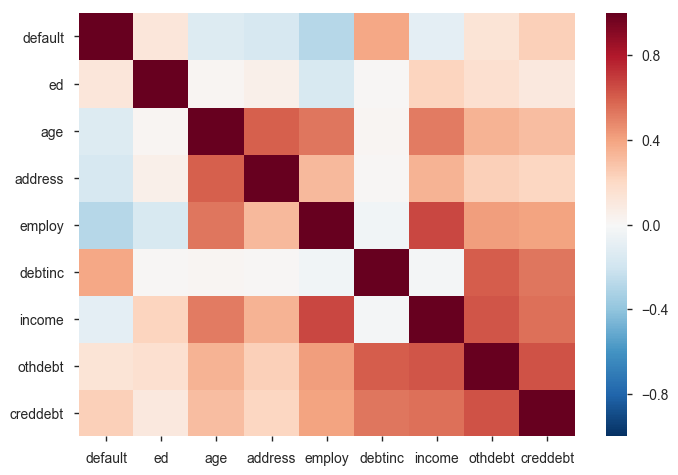

In [17]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bankloans_existing.corr())

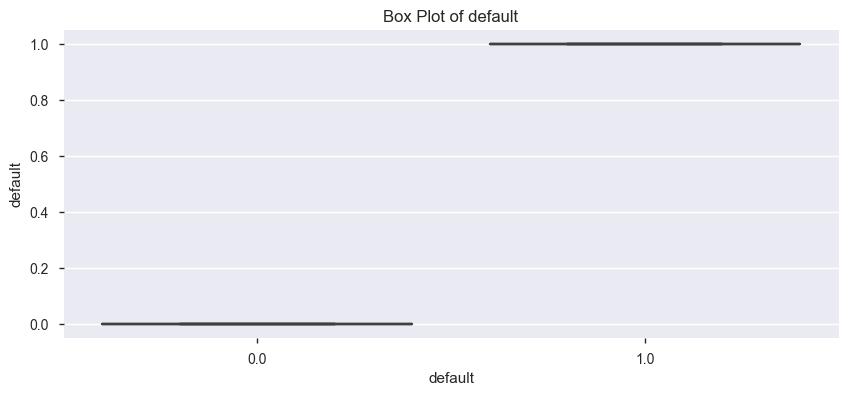

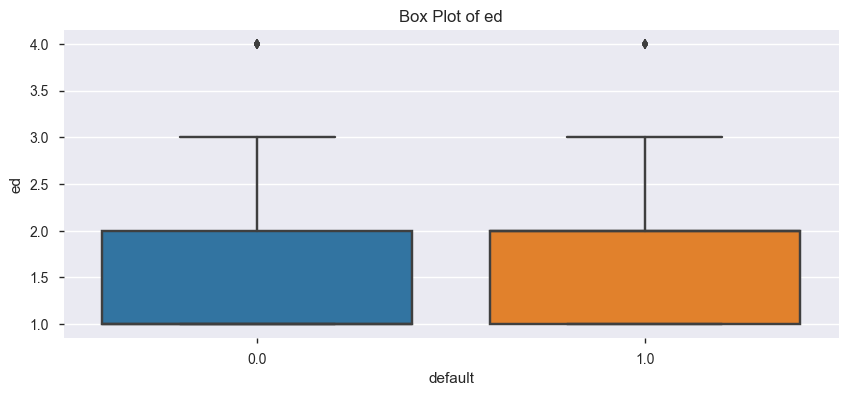

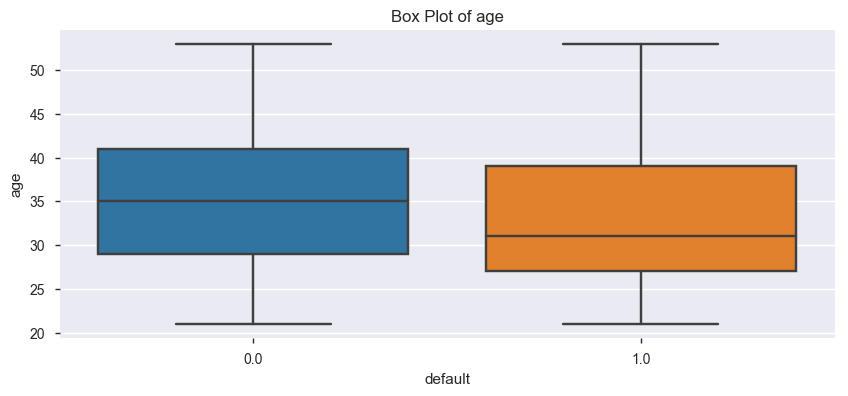

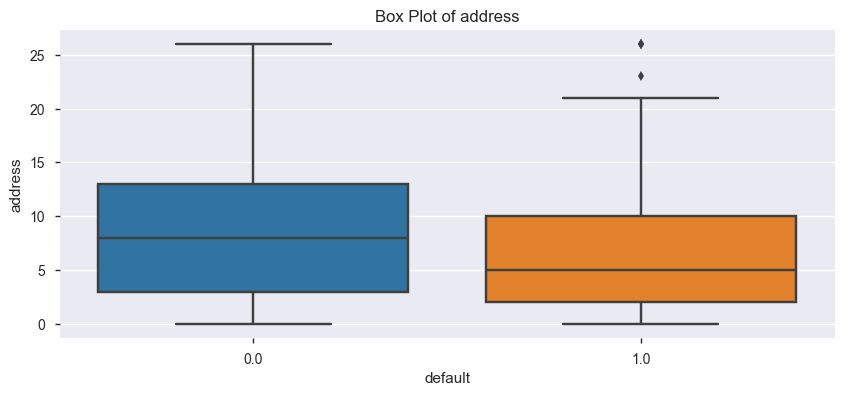

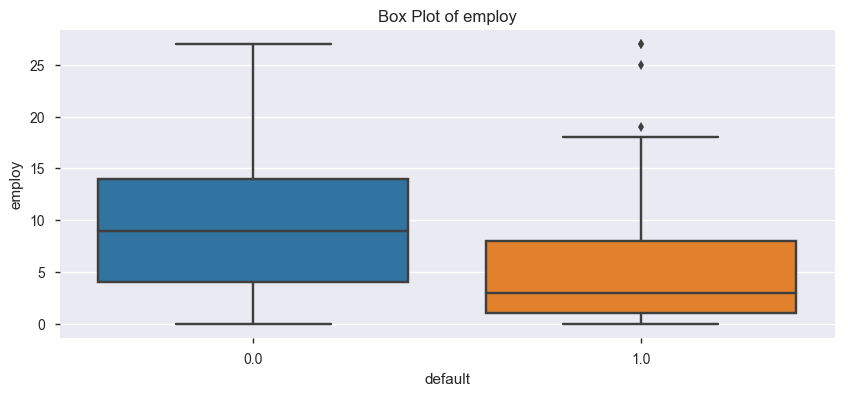

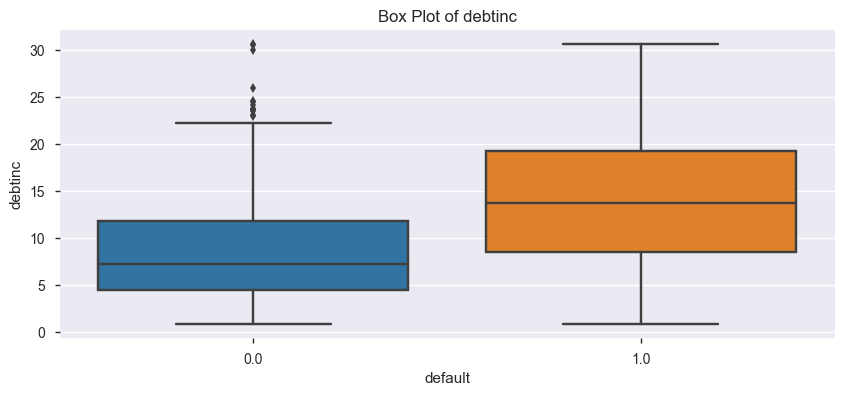

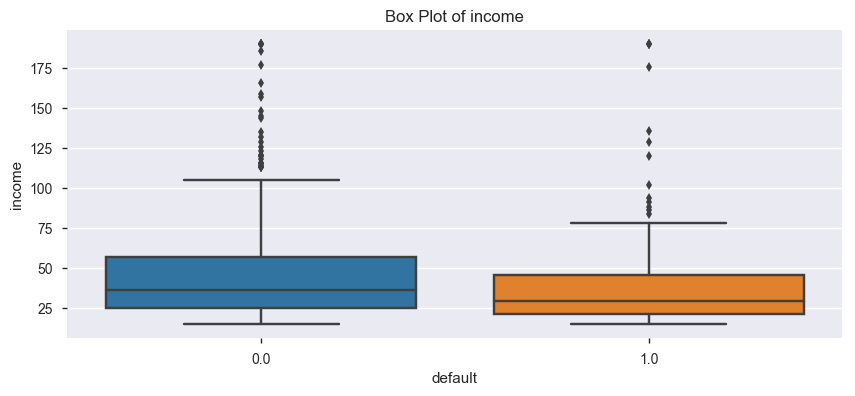

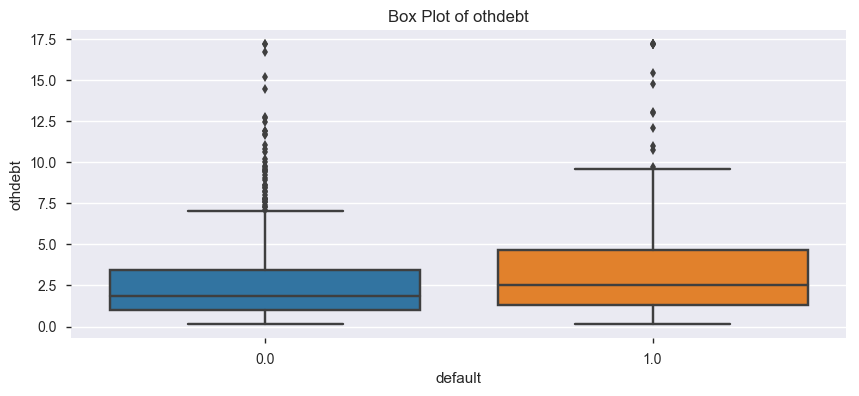

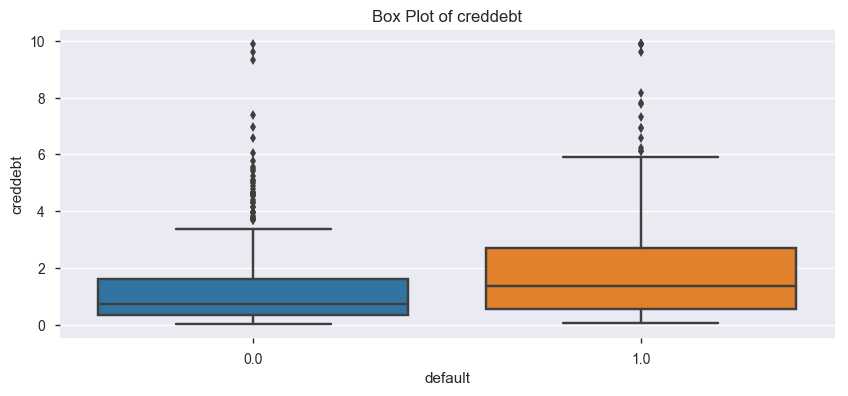

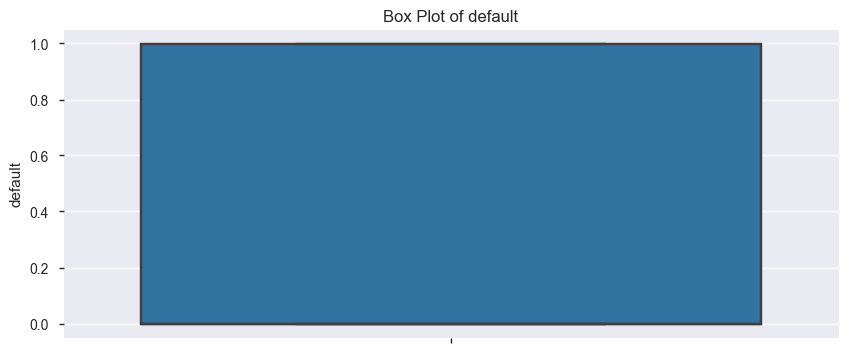

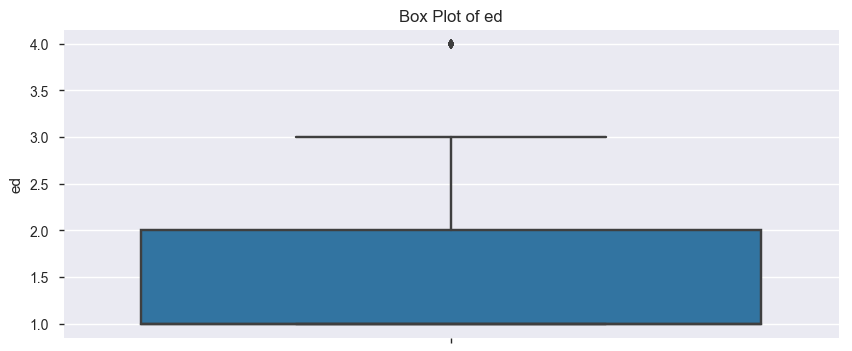

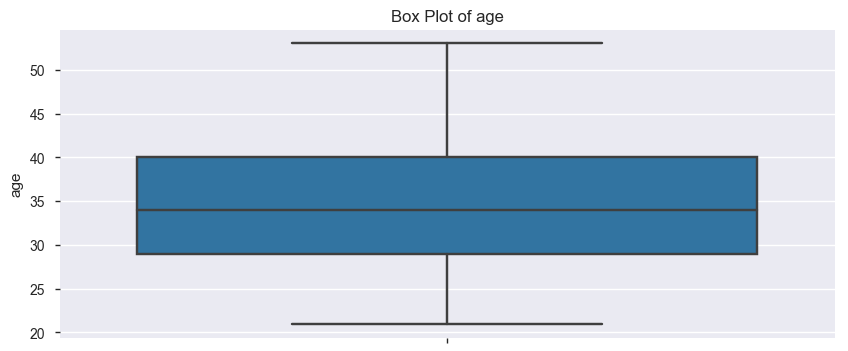

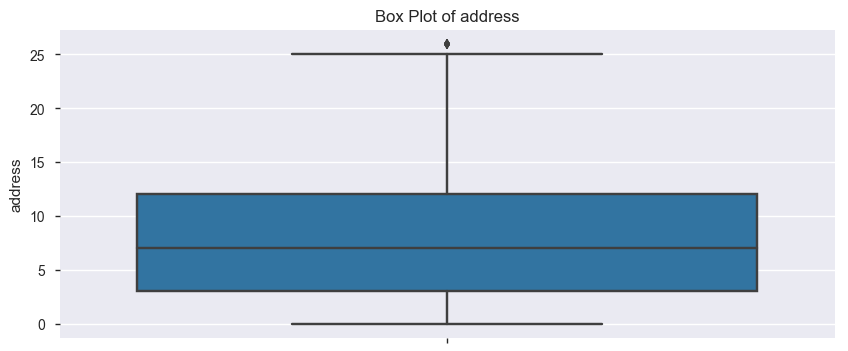

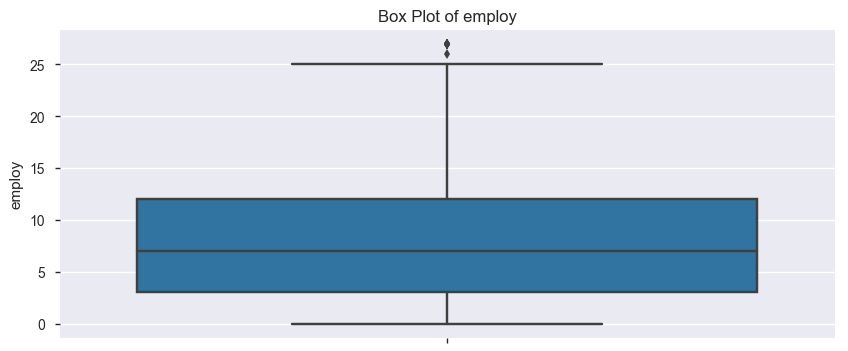

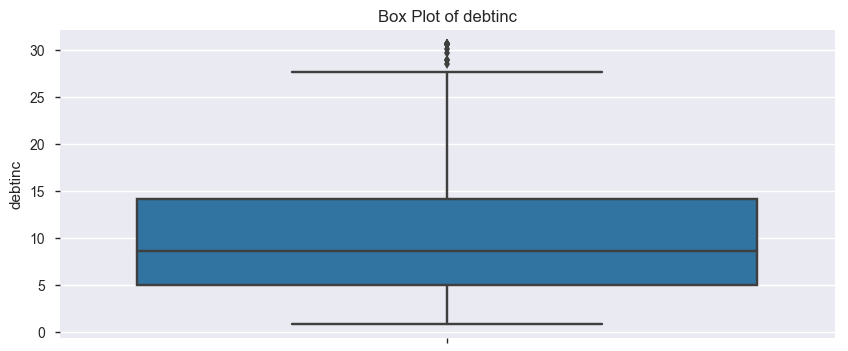

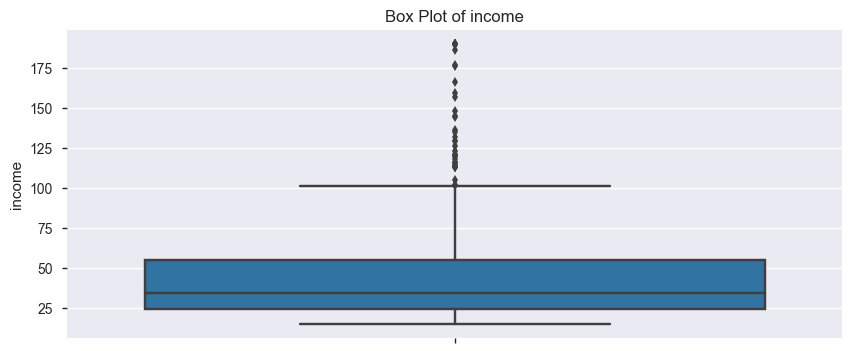

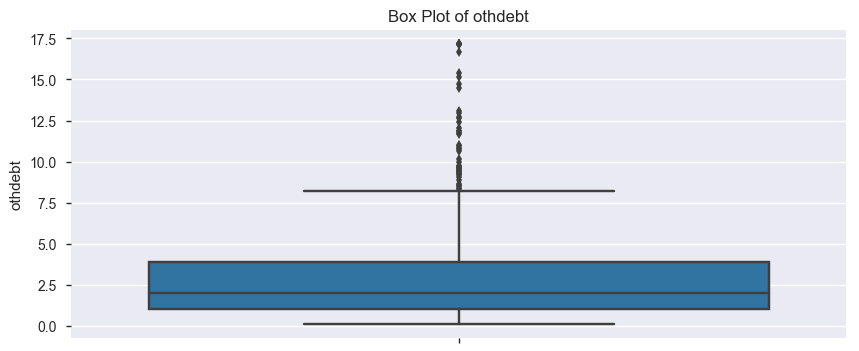

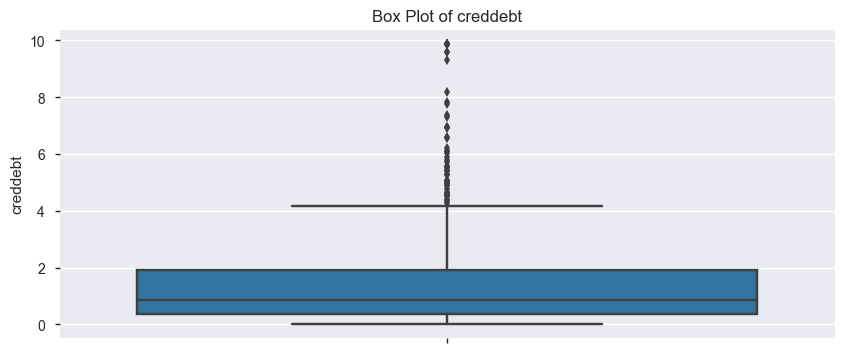

In [18]:
bp = PdfPages('BoxPlots with default Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=num_variable, data = bankloans_existing)
    sns.plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = bankloans_existing)
    sns.plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

###### 2.1 Data Exploratory Analysis
    - Bivariate Analysis - Numeric(TTest) and Categorical(Chisquare)

In [19]:
## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in numeric_var_names:
    tstats = stats.ttest_ind(bankloans_existing[bankloans_existing['default']==1][num_variable],bankloans_existing[bankloans_existing['default']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

  Variable Name T-Statistic      P-Value
0       default         inf            0
1            ed     3.15351   0.00168236
2           age    -3.69893  0.000233527
3       address    -4.43055  1.09104e-05
4        employ    -7.92136  9.27995e-15
5       debtinc     11.1409  1.20241e-26
6        income    -2.64329   0.00839468
7       othdebt      3.7073  0.000226095
8      creddebt     6.47909   1.7428e-10


###### 2.2 Data Exploratory Analysis
    - Visualization of variable importance

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


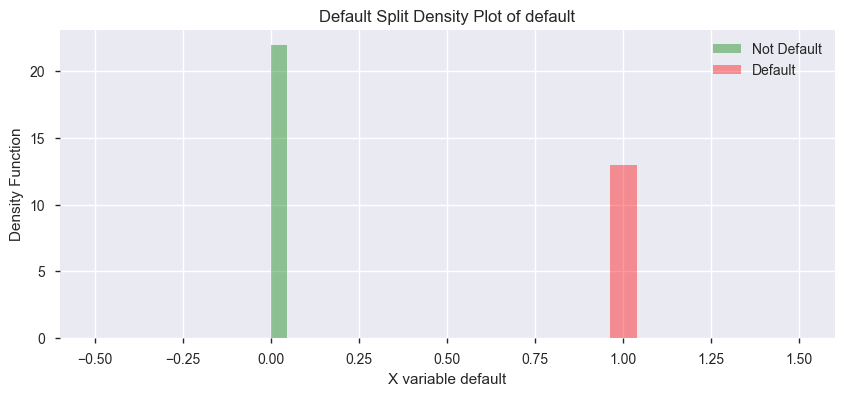

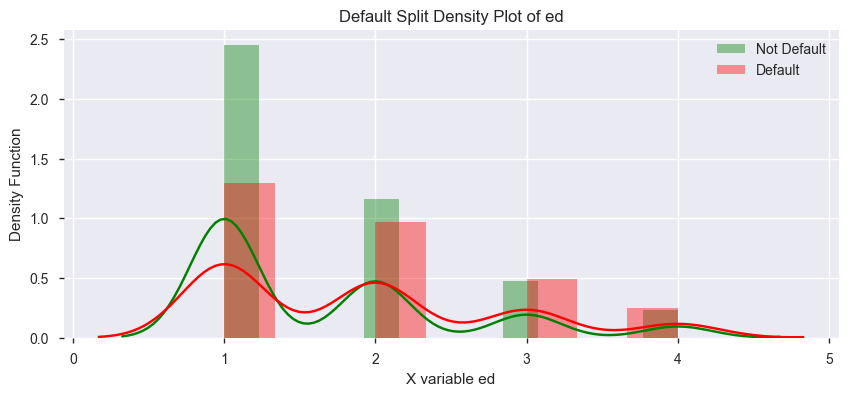

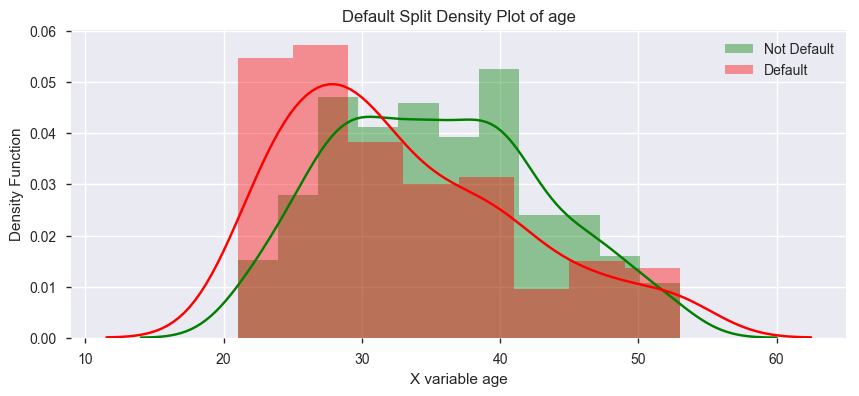

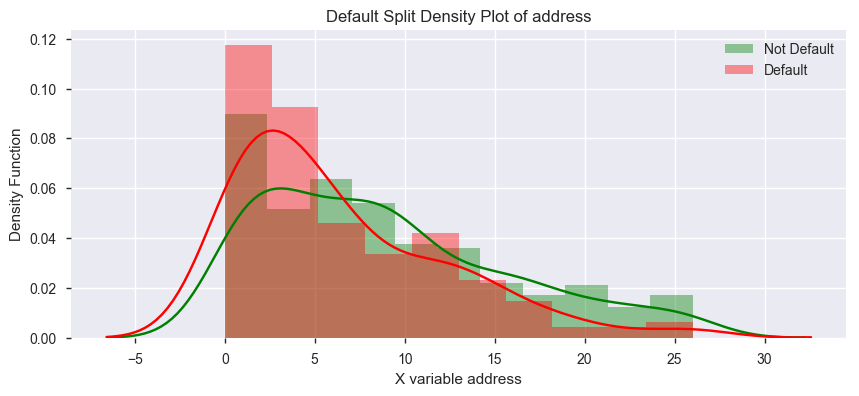

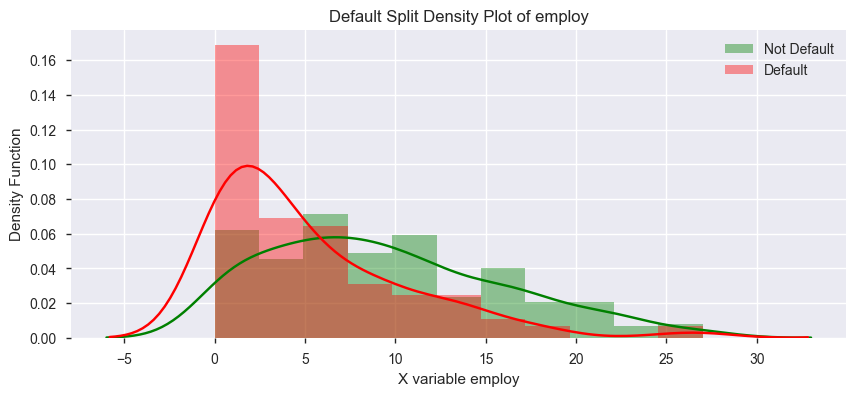

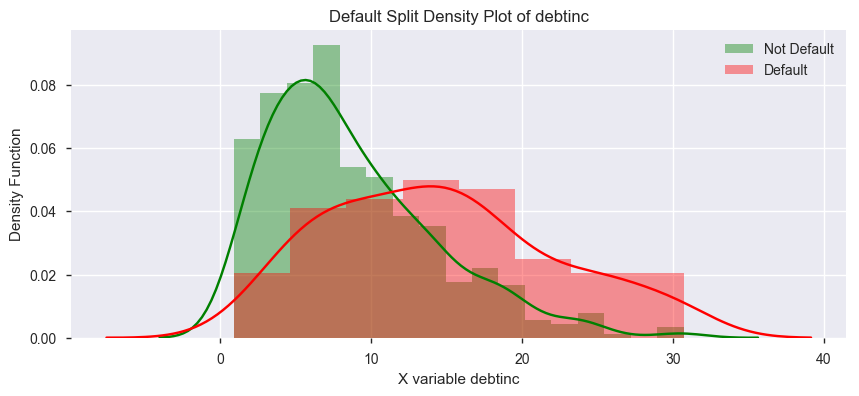

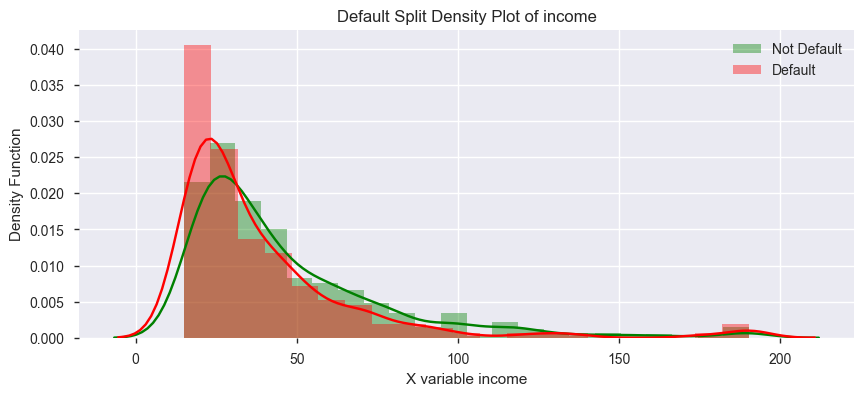

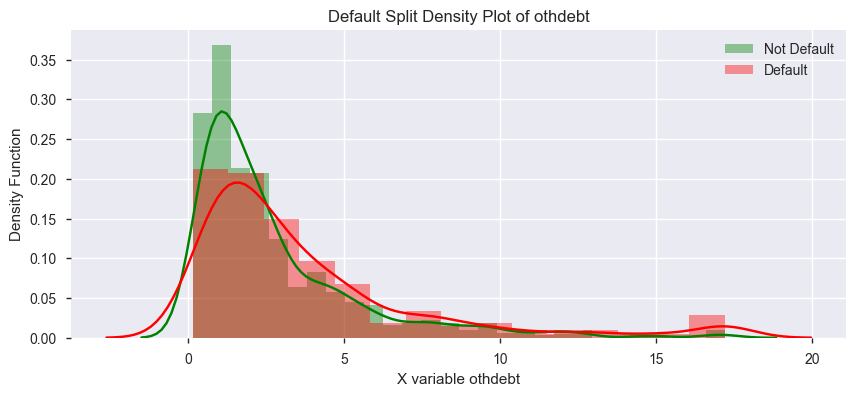

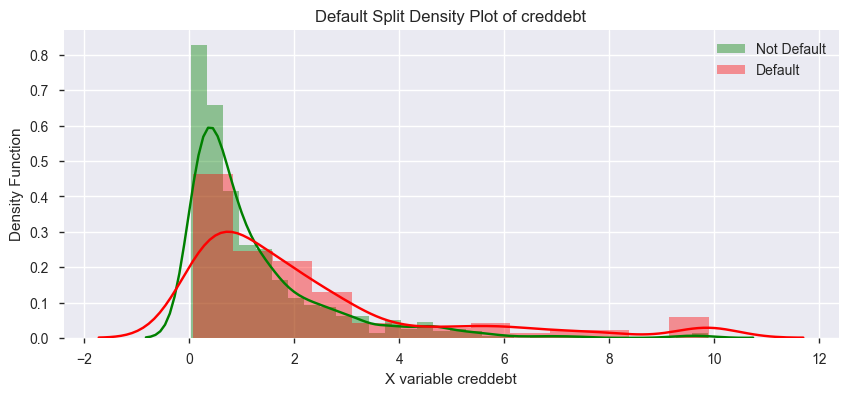

In [20]:
bp = PdfPages('Density Plots with Attrition Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[num_variable], kde=False, color='g', hist=True)
    sns.distplot(bankloans_existing[bankloans_existing['default']==0][num_variable], label='Not Default', color='g', hist=True, norm_hist=False)
    sns.distplot(bankloans_existing[bankloans_existing['default']==1][num_variable], label='Default', color='r', hist=True, norm_hist=False)
    sns.plt.xlabel(str("X variable ") + str(num_variable) )
    sns.plt.ylabel('Density Function')
    sns.plt.title(str('Default Split Density Plot of ')+str(num_variable))
    sns.plt.legend()
    bp.savefig(fig)

bp.close()

###### 2.4 Data Exploratory Analysis
    - Variable Transformation: (i) Bucketing

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log


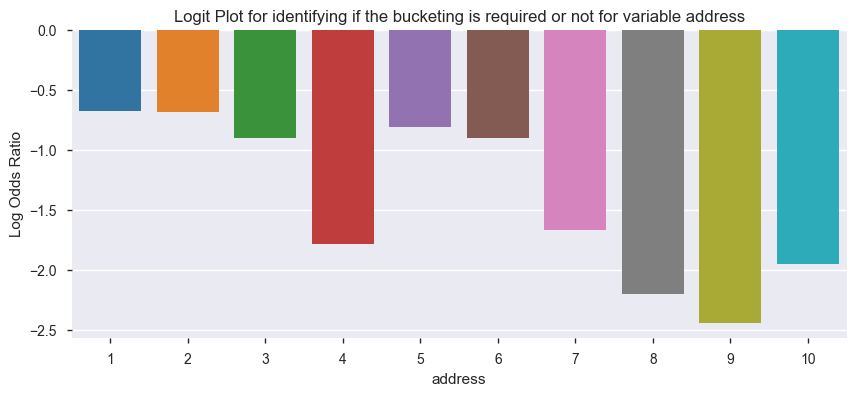

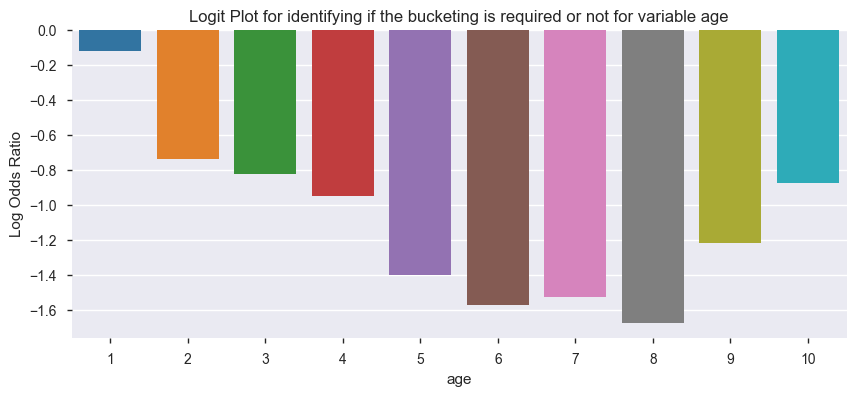

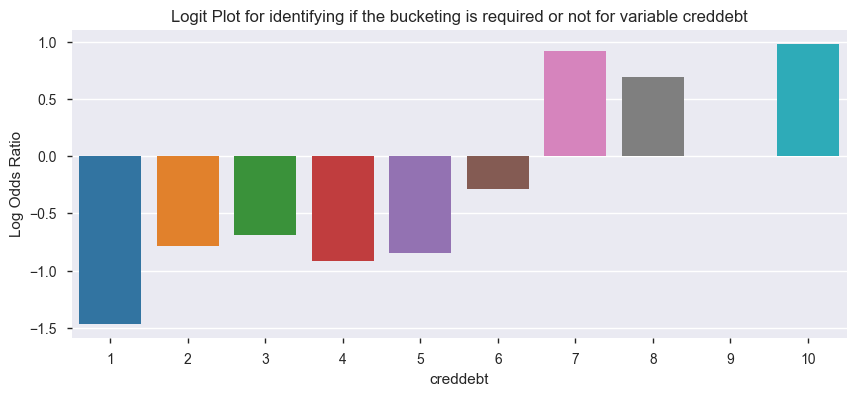

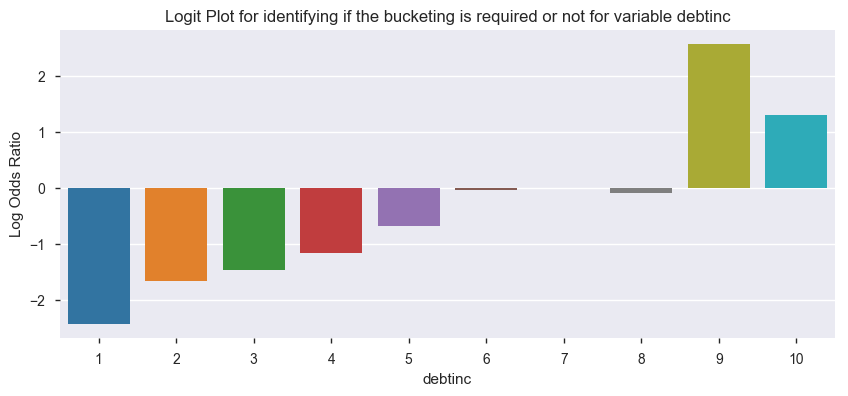

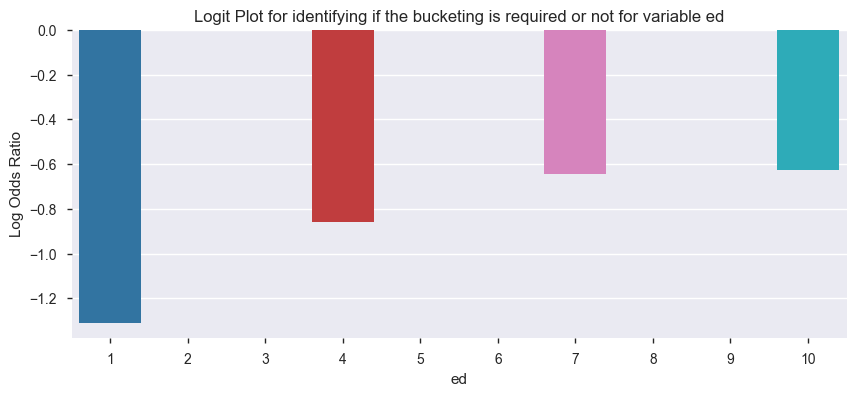

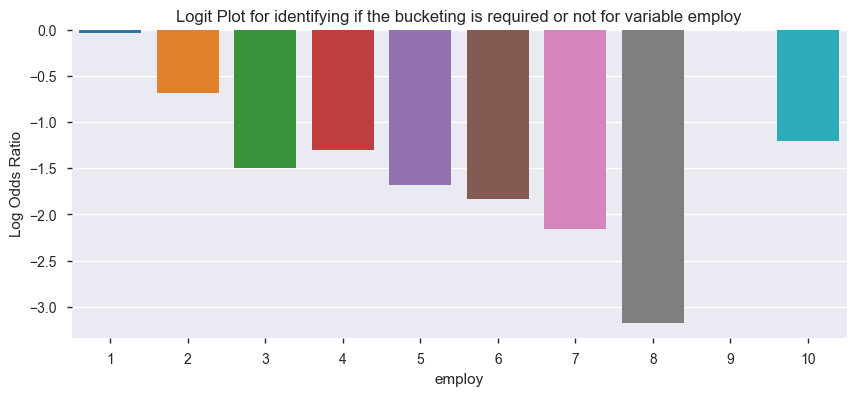

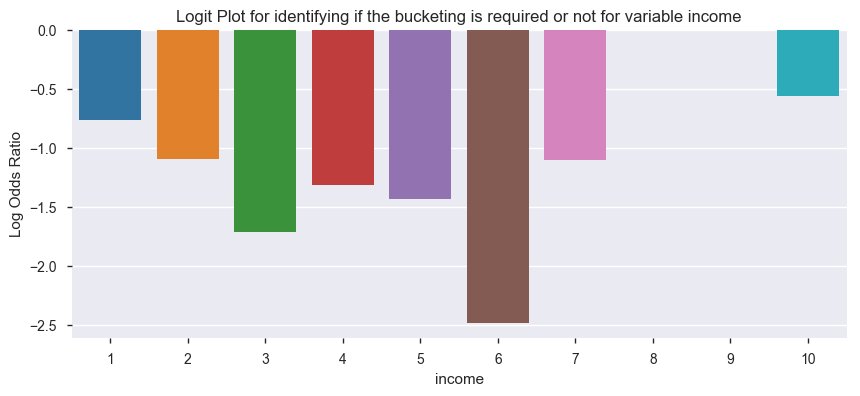

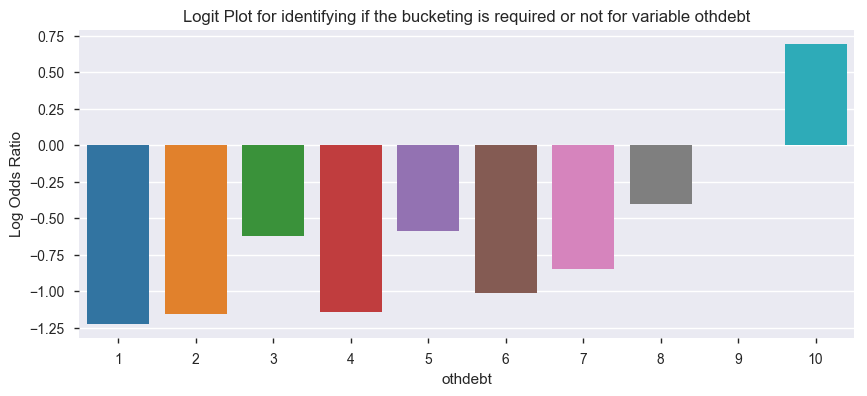

In [21]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in bankloans_existing.columns.difference(['default']):
    binned = pd.cut(bankloans_existing[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = bankloans_existing.groupby(binned)['default'].sum() / (bankloans_existing.groupby(binned)['default'].count()-bankloans_existing.groupby(binned)['default'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    sns.plt.ylabel('Log Odds Ratio')
    sns.plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [22]:
print('These variables need bucketing - creddebt, othdebt, debtinc, employ, income ')
bankloans_existing.columns

These variables need bucketing - creddebt, othdebt, debtinc, employ, income 


Index([u'default', u'ed', u'age', u'address', u'employ', u'debtinc', u'income',
       u'othdebt', u'creddebt'],
      dtype='object')

In [23]:
bankloans_existing[['creddebt', 'othdebt', 'debtinc', 'employ','income' ]].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
creddebt,700.0,1.498843,1.788451,0.030209,0.170020,0.301390,0.440418,0.593059,0.854869,1.183471,1.615023,2.288026,3.621504,9.891428
othdebt,700.0,3.027290,3.115401,0.160936,0.562232,0.900747,1.165766,1.546101,1.987567,2.511054,3.258777,4.577926,7.036180,17.184744
debtinc,700.0,10.222153,6.682160,0.900000,2.900000,4.500000,5.800000,7.000000,8.600000,10.500000,12.900000,15.440000,19.610000,30.701000
employ,700.0,8.358671,6.566008,0.000000,1.000000,2.000000,4.000000,5.600000,7.000000,9.000000,11.000000,14.000000,18.000000,27.010000
income,700.0,44.848714,31.942133,15.000000,19.000000,22.000000,26.000000,29.000000,34.000000,40.400000,49.000000,61.000000,82.000000,190.300000


In [24]:
#bucekting
#bankloans_existing['creddebt_extreme'] = bankloans_existing['creddebt'].apply(lambda x: 0 if 162 < x < 221 else 1)
#bankloans_existing['othdebt_extreme'] = bankloans_existing['othdebt'].apply(lambda x: 0 if 0.6 <= x < 0.84 else 1)
#bankloans_existing['debtinc_extreme'] = bankloans_existing['debtinc'].apply(lambda x: 0 if 0.6 <= x < 0.84 else 1)
#bankloans_existing['debtinc_extreme'].value_counts()

###### 2.5 Data Exploratory Analysis
    - Variable Reduction using Somer's D values

In [25]:

somersd_df = pd.DataFrame()
for num_variable in bankloans_existing.columns.difference(['default']):
    logreg = sm.logit(formula = str('default ~ ')+str(num_variable), data=bankloans_existing)
    result = logreg.fit()
    summ = result.summary()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(bankloans_existing['default'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


,Variable Name,SomersD
0,address,0.222384
0,age,0.206329
0,creddebt,0.272378
0,debtinc,0.470506
0,ed,0.148302
0,employ,0.409138
0,income,0.200273
0,othdebt,0.173806


In [26]:
## Variance Inflation Factor assessment
X = pd.concat([bankloans_existing[bankloans_existing.columns.difference(['default'])],bankloans_existing['default']], axis=1)
features = "+".join(bankloans_existing.columns.difference(['default']))
X.head()

a,b = dmatrices(formula_like='default ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print vif

   VIF Factor   features
0   36.910987  Intercept
1    1.561802    address
2    2.037593        age
3    2.628899   creddebt
4    3.910509    debtinc
5    1.287345         ed
6    2.401544     employ
7    5.121585     income
8    4.562072    othdebt


In [27]:
#Train and Test split

train_features = X.columns.difference(['default'])
train_X, test_X = train_test_split(X, test_size=0.3, random_state=42)
train_X.columns

Index([u'address', u'age', u'creddebt', u'debtinc', u'ed', u'employ',
       u'income', u'othdebt', u'default'],
      dtype='object')

In [28]:
logreg = sm.logit(formula='default ~ ' + "+".join(train_features), data=train_X)
result = logreg.fit()
summ = result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.425391
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Sun, 05 Nov 2017   Pseudo R-squ.:                  0.2749
Time:                        15:00:27   Log-Likelihood:                -208.44
converged:                       True   LL-Null:                       -287.47
                                        LLR p-value:                 4.065e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3844      0.736     -1.881      0.060      -2.827       0.058
address       -0.0853      0.026     -3.306      0.001      -0.136      -0.035
age            0.0389      0.020      1.924      0.054      -0.001       0.078
creddebt       0.6410      0.139      4.628      0.000       0.370       0.912
debtinc        0.0353      0.039      0.907      0.365      -0.041       0.112
ed             0.0080      0.142      0.056      0.955      -0.271       0.287
employ        -0.2650      0.040     -6.641      0.000      -0.343      -0.187
income        -0.0089      0.012     -0.721      0.471      -0.033       0.015
othdebt        0.1249      0.102      1.226      0.220      -0.075       0.325
==============================================================================
"""

In [29]:
train_gini = 2*metrics.roc_auc_score(train_X['default'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['default'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

('The Gini Index for the model built on the Train Data is : ', 0.68166191514338403)
('The Gini Index for the model built on the Test Data is : ', 0.76651033084041065)


In [30]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['default']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
357,1.0,0.573708
649,0.0,0.500030
291,0.0,0.060040
420,1.0,0.574824
177,0.0,0.132731


In [31]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['default']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
158,1.0,0.198828
500,0.0,0.485425
396,0.0,0.051498
155,0.0,0.279162
321,1.0,0.334386


In [32]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [33]:
roc_like_df

,cutoff,sensitivity,specificity
0,0.000000,1.000000,0.000000
0,0.020408,0.992537,0.193820
0,0.040816,0.985075,0.286517
0,0.061224,0.970149,0.351124
0,0.081633,0.962687,0.401685
0,0.102041,0.955224,0.446629
0,0.122449,0.925373,0.488764
0,0.142857,0.925373,0.522472
0,0.163265,0.917910,0.556180
0,0.183673,0.895522,0.595506


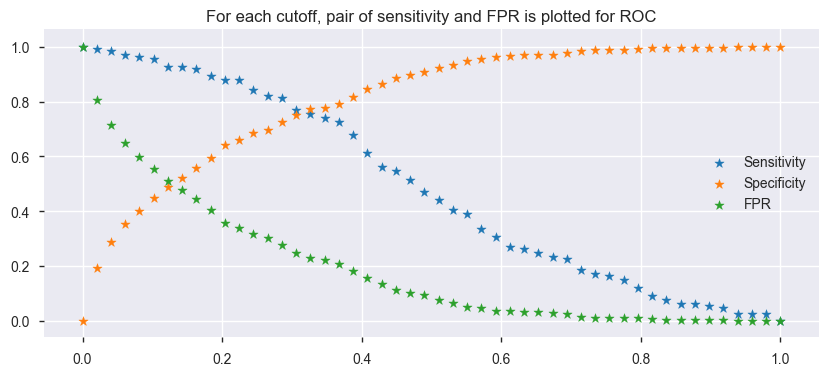

In [94]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [34]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.22449,0.880597,0.660112,1.540709
